<h1 style="color:green">Анализ рынка общественного питания в Москве</h1>

    В данном проекте стоит задача определить текущую ситуацию на рынке общественного питания. Ещё есть предложение открыть в Москве новое кафе, которое будет обслуживаться роботами. 
    
    Целесообразность открытия кафе, к тем более такого необычного, по приведенным данным определить нельзя, заведение общественного питания это сложный бизнес, который включает в себя много сложных составляющих,  в том числе большого количества расходов, связанных с открытием и эксплуатацией заведения.
    
    По приведенным данным можно попробовать составить текущую картину на рынке заведений и сделать несколько предположений.
    
    Построим графики и взглянем на заведения общественного питания с разных сторон

<h3 style="color:green">Импорт данных</h3>

**Импортируем необходимые для работы библиотеки и исходный файл с данными по объетам общественного питания в Москве**

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-dark')
from plotly import graph_objects as go

from pymystem3 import Mystem
m = Mystem()
from collections import Counter

In [2]:
rest_data = pd.read_csv('C://Users/Sergei/2020_portfolio_projects//catering_data.csv')
rest_data.sample(10)

id                          object_name chain object_type  \
10276  180079                            ДАБЛ КАПС   нет        кафе   
5929    89387                                 Лето    да         бар   
12014  184818                          Пицца Паоло    да        кафе   
10415  176011                               Шаурма   нет  закусочная   
5953    25921                              АРИАДНА   нет    ресторан   
7355    28983               ШКОЛА 1569 «СОЗВЕЗДИЕ»   нет    столовая   
13175  200397                    Кафе «Кофе Поинт»   нет        кафе   
1378    21143  СПОРТИВНО-ОЗДОРОВИТЕЛЬНЫЙ ЦЕНТР МЭИ   нет        кафе   
4058    29590               Столовая ГБОУ ЦО № 936   нет    столовая   
6734    80973                             МАТРЕШКА   нет    ресторан   

                                                 address  number  
10276  город Москва, Большая Дорогомиловская улица, д...      44  
5929   город Москва, Рязанский проспект, дом 32, корп...      53  
12014             город Москва, Матвеевская улица, дом 2       0  
10415           город Москва, Первомайская улица, дом 39       0  
5953              город Москва, Привольная улица, дом 70      75  
7355   город Москва, улица Мусы Джалиля, дом 36, корп...     240  
13175  город Москва, 2-я Звенигородская улица, дом 13...       5  
1378           город Москва, Энергетическая улица, дом 3      24  
4058    город Москва, Задонский проезд, дом 34, корпус 3     240  
6734   город Москва, Кутузовский проспект, дом 2/1, с...      86

<h3 style="color:green">Данные о таблице</h3>

In [3]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


<h3 style="color:green">Приведем данные к удобному для анализа виду</h3>

In [4]:
# Если посмотреть на топ-50 заведений по количеству, то увидим, что даже для крупных сетей 
# можно встретить одно и тоже заведение с названием, которое будет отличаться только регистром букв.
# Чтобы минимизировать такие неточности, приведем к нижнему регистру. Принадлежность к сети будет
# легче считываться если указать её более очевидно словами, также это упростит отображение информации
# на графике. Предприятие быстрого питания заменим на 'фастфуд', такое название широко используется в 
# быту и будет удобней при построении графиков.

rest_data['chain'] = rest_data['chain'].replace('да', "Сетевые")
rest_data['chain'] = rest_data['chain'].replace('нет', "Несетевые")
rest_data['object_type'] = rest_data['object_type'].replace('предприятие быстрого обслуживания', "фастфуд")
rest_data['object_type'] = rest_data['object_type'].replace('магазин (отдел кулинарии)', "кулинария")
rest_data['object_name'] = rest_data['object_name'].str.lower()

<h3 style="color:green">Исследуем соотношение видов объектов общественного питания по количеству.</h3>

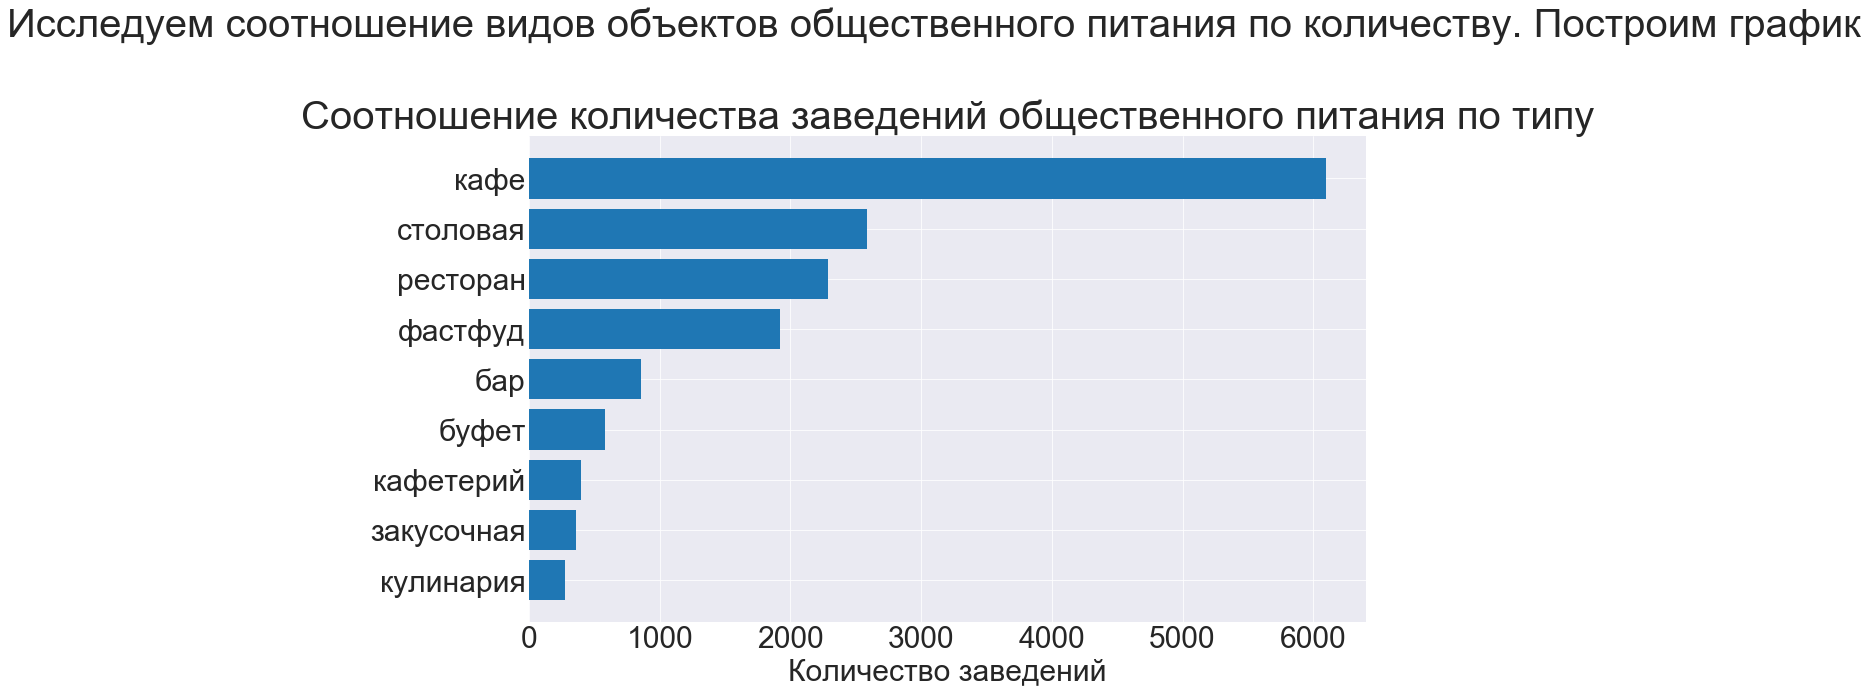

<Figure size 1080x720 with 0 Axes>

In [5]:
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.3, top=0.8)
fig = plt.suptitle('Исследуем соотношение видов объектов общественного питания по количеству. Построим график', fontsize=40)
plt.barh( rest_data.groupby('object_type').count().reset_index().sort_values(by = 'number')['object_type'], 
        rest_data.groupby('object_type').count().reset_index().sort_values(by = 'number')['number'])
plt.grid(True)
plt.title('Соотношение количества заведений общественного питания по типу',fontsize = 40)
plt.xlabel('Количество заведений',fontsize = 30)
plt.yticks(fontsize = 30)
plt.xticks(fontsize = 30)
plt.show()

fig = plt.figure(figsize=(15,10))

labels_pie = list(rest_data.groupby('object_type').count().reset_index().sort_values(by = 'number')['object_type'])
values_pie = list(rest_data.groupby('object_type').count().reset_index().sort_values(by = 'number')['number'])
fig = go.Figure(data=[go.Pie(labels=labels_pie, 
                             values=values_pie, title='Соотношение количества заведений общественного питания по типу')])
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

На графике видно, что кафе в городе больше чем любых других заведений больше чем в два раза, значит кафе - это пользующийся спросом формат заведения общественного питания.

<h3 style="color:green">Для какого вида объекта общественного питания характерно сетевое распространение?</h3>

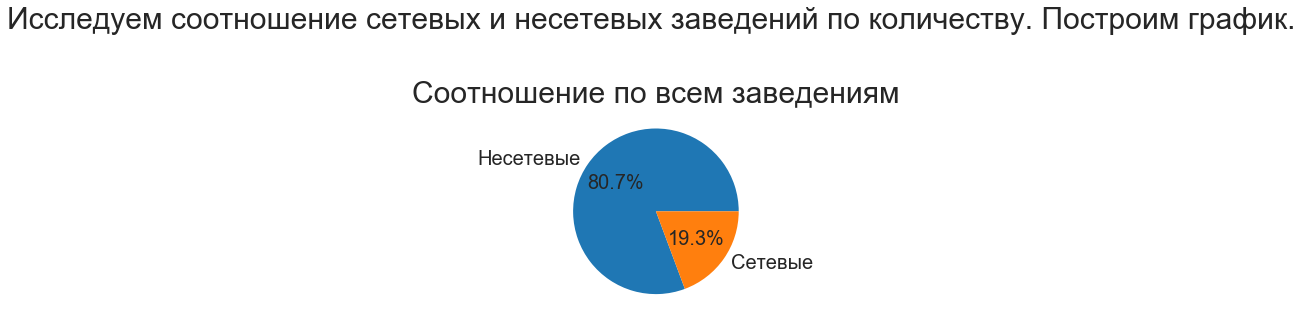

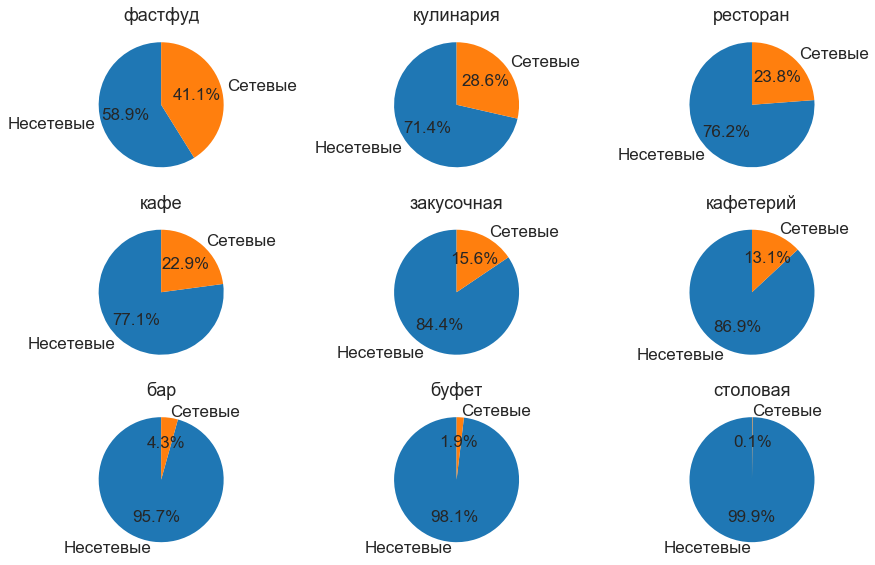

In [6]:
chain = pd.merge(rest_data[rest_data['chain'] == 'Сетевые'].groupby('object_type').count()['id'].reset_index(),
        rest_data[rest_data['chain'] == "Несетевые"].groupby('object_type').count()['id'].reset_index(),
        how = 'inner', on = 'object_type')
chain.columns = ['object_type', 'Сетевые', 'Несетевые']

chain['chain_percent'] =  chain['Сетевые'] / (chain['Несетевые'] + chain['Сетевые']) * 100
chain.sort_values(by = 'chain_percent', ascending = False)

fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.2, top=0.7)


plt.pie(rest_data.groupby('chain').count().reset_index()['number'],
        labels = rest_data.groupby('chain').count().reset_index()['chain'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 20}
        )
fig.suptitle('Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.', fontsize=30)
plt.title('Соотношение по всем заведениям', fontsize = 30)
plt.show()


chains = rest_data.pivot_table(index = 'chain', columns = 'object_type', values = 'number', aggfunc = 'count')

fig = plt.figure(figsize=(15,40))

fig.subplots_adjust(hspace=0.2, top=0.7)
angle = -270 

for row in zip(list(chain.sort_values(by = 'chain_percent', ascending = False)['object_type']), [ 931+ x*1 for x in range(9)]):
    object = row[0]
    subplot = row[1]
    ax2 = fig.add_subplot(subplot)
    plt.pie(chains[object],labels = ['Несетевые','Сетевые'], startangle=angle, autopct='%1.1f%%',
        textprops={'fontsize': 17}
       )
    plt.xlabel('')
    plt.title(object,fontsize = 18)
    

На графике видно, что сетевой формат для заведений общественного питания распределен неравномерно, одни заведения лекго можно масштабировать и создавать сеть, другие требуют более индивидуального подхода и с точки зрения бизнеса тяжело развивать целую сеть.

    1. Фастфуд(предприятия быстрого обслуживания). Больше 40 процентов заведений сетевого типа, это может быть связано как с необходимостью сделать цены на продукцию более доступными, а сервис быстрым. Достичь это можно за счёт стандартизации производстава и формата оказывания услуг. Для сети это сделать проще.

    2. Магазин(отдел кулинарии). Основная привязка к магазинам, магазины в основном сетевые, отсюда и высокий процент таких заведений. Самостоятельно такой бизнес редко представлен, обычно кулинарии являются второстепенным продуктом, бизнесом, который предоставляет сопутствующие товары и услуги. В предоставленных данных таких заведений немного, трудно делать объективные выводы.
    
    3. Ресторан. Чуть меньше четверти заведений сетевого формата. Тоже достаточно большой процент, можно предположить, что такая ситуация связана с особенностью таких заведений. Сеть может хорошо себя продавать, если найден некий стиль, который устраивает потребителя и потребителю важно получать предсказуемый сервис.
    
    4. Кафе. Ситуация, схожая с рестораном, отличие в том, что сервис и блюда в среднем несколько проще и доступней. Также неплохая возможность масштабировать бизнес заняв определённую нишу, которая будет интересна потребителю и он готов идти за 'брэндом'
    
    5. Закусочная и кафетерий. Формат ещё более доступный и простой. Заведения в среднем меньшей проходимости чем кафе. Данные представлены всего для чуть более 600 заведений. Часто такие заведения выдают как кафе, выводы можно делать плюс/минус те же.
    
    6. Бар. Небольшой процент, всего чуть больше 4 процентов может быть связан с тем, что такие заведения большинством посещаются менее регулярно, а необходимость уникального подхода к созданию подходящей атмосферы делает трудным для масштабирования таких заведений как сеть.
    
    7. Столовая и буфет. Заведения, как правило, которые начинают функционировать только при наличии какого то другого бизнеса, производтсва и т.д. Столовые и буфеты используются в основном людьми во время работы. Кухня большинства столовых сильно отличается друг от друга, еда готовится, как правило, на месте, такой формат тяжело масшатбировать. 
    

<h3 style="color:green">Для каждого вида объекта общественного питания опишем среднее количество посадочных мест</h3>

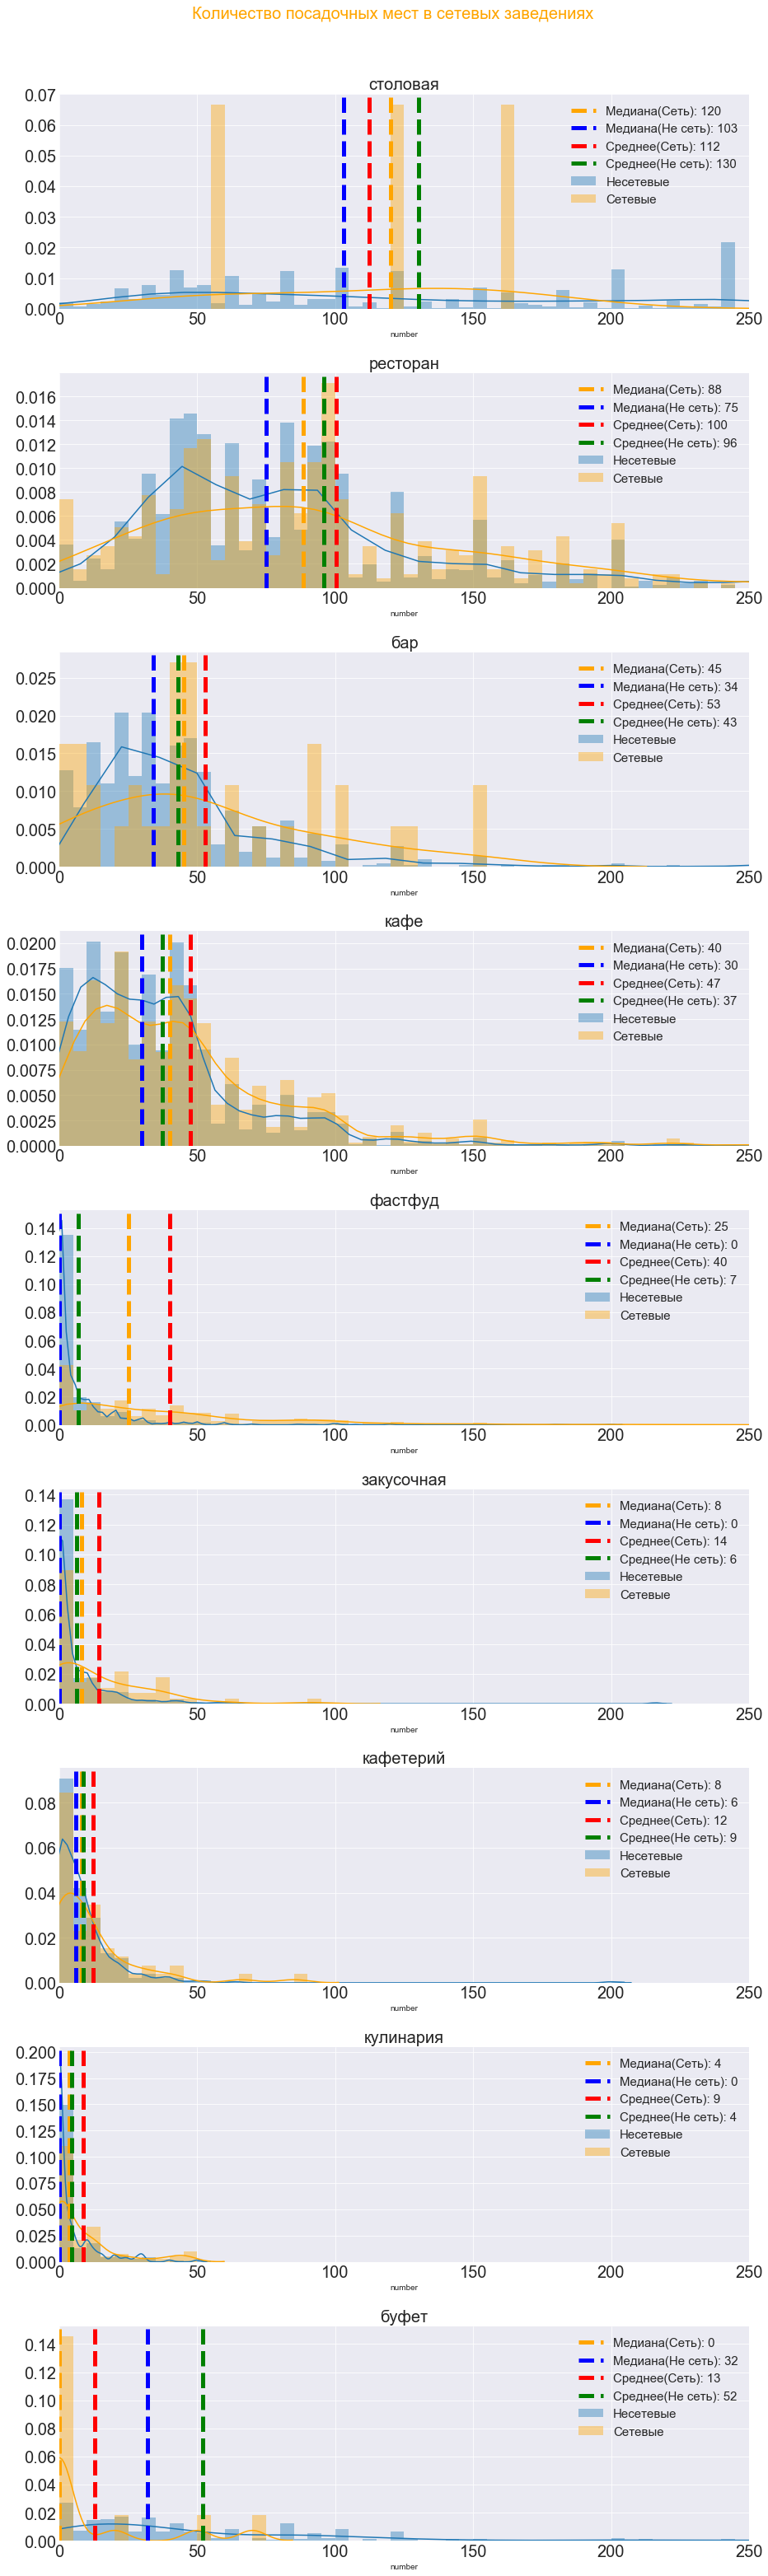

In [7]:
fig = plt.figure(figsize=(15,50))
fig.suptitle('Количество посадочных мест в сетевых заведениях', fontsize=20, color = 'orange')
fig.subplots_adjust(hspace=0.3, top=0.95)
angle = -270 



for row in zip(list(rest_data[rest_data['chain'] == 'Сетевые'].groupby('object_type')['number'].median().reset_index().sort_values(by = 'number',
         ascending = False)['object_type']), [ 911+ x*1 for x in range(9)]):
    object = row[0]
    subplot = row[1]
    ax2 = fig.add_subplot(subplot)
    sns.distplot(rest_data[(rest_data['chain'] == 'Несетевые') & (rest_data['object_type'] == object)]['number'],
                                             bins=[x*5 for x in range(50)], label = 'Несетевые')
    sns.distplot(rest_data[(rest_data['chain'] == 'Сетевые') & (rest_data['object_type'] == object)]['number'],
                                             bins=[x*5 for x in range(50)], color = 'orange', label = 'Сетевые')
    plt.axvline(x=rest_data[(rest_data['chain'] == 'Сетевые') & (rest_data['object_type'] == object)]['number'].median(),
            color='orange', linestyle='--', label = 'Медиана(Сеть): {:.0f}'.format(rest_data[(rest_data['chain'] == 'Сетевые') & (rest_data['object_type'] == object)]['number'].median()),linewidth = 5)
    
    plt.axvline(x=rest_data[(rest_data['chain'] == 'Несетевые') & (rest_data['object_type'] == object)]['number'].median(),
            color='blue', linestyle='--', label = 'Медиана(Не сеть): {:.0f}'.format(rest_data[(rest_data['chain'] == 'Несетевые') & (rest_data['object_type'] == object)]['number'].median()),linewidth = 5)
    plt.axvline(x=rest_data[(rest_data['chain'] == 'Сетевые') & (rest_data['object_type'] == object)]['number'].mean(),
            color='red', linestyle='--', label = 'Среднее(Сеть): {:.0f}'.format(rest_data[(rest_data['chain'] == 'Сетевые') & (rest_data['object_type'] == object)]['number'].mean()),linewidth = 5)
    plt.axvline(x=rest_data[(rest_data['chain'] == 'Несетевые') & (rest_data['object_type'] == object)]['number'].mean(),
            color='green', linestyle='--', label = 'Среднее(Не сеть): {:.0f}'.format(rest_data[(rest_data['chain'] == 'Несетевые') & (rest_data['object_type'] == object)]['number'].mean()),linewidth = 5)
    plt.xlim(0,250)
    plt.legend(fontsize = 15,shadow=True,  facecolor='y', edgecolor='r')
    plt.yticks(fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.title(object,fontsize = 20)
    #ax2.legend(bbox_to_anchor=(1.5, 1.05),fontsize = 20,shadow=True,  facecolor='y', edgecolor='r')
    plt.grid()
    
plt.show()

<h3 style="color:green">Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?</h3>

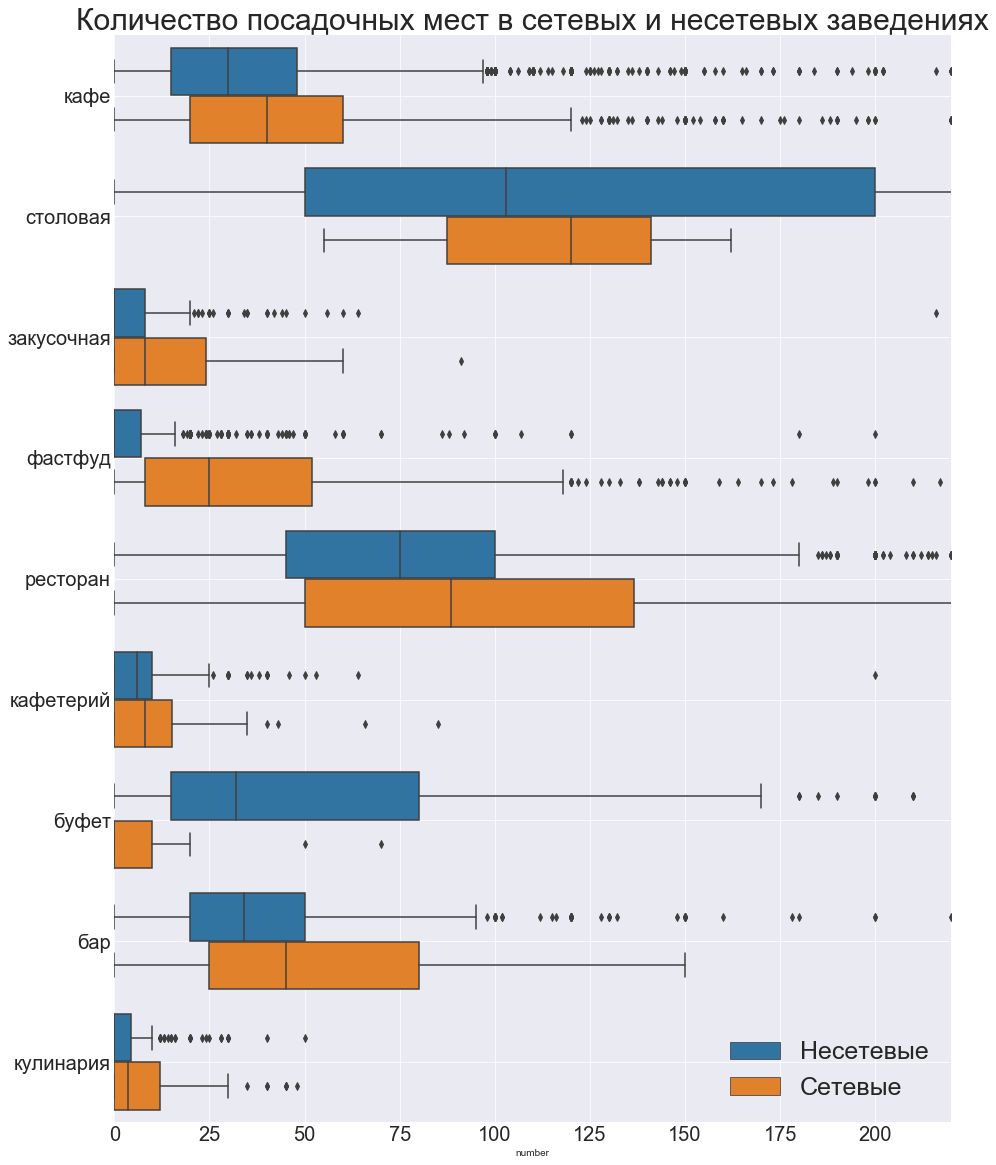

In [8]:
fig = plt.figure(figsize=(15,20))
sns.boxplot(x="number", y="object_type", data=rest_data, hue = 'chain')
plt.xlim(0,220)
plt.legend(fontsize = 25)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.ylabel(None)
plt.grid()
plt.title('Количество посадочных мест в сетевых и несетевых заведениях',fontsize = 30)
plt.show()

    Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

    По количеству посадочных мест в заведениях можно отталкиваться от значений среднего и медианы. Эти значения, как и гистограммы распределения, показывают, что у сетевых заведений в среднем чуть больше посадочных мест. 
    
    В целом распределение количества мест в сетевых заведениях схоже с несетевыми. Можно предположить, что сетевые заведения относительно несетевых стремятся сделать меньше заведений с большим количеством мест. Об этом говорит и относительный процент сетевых заведений, графики гистограммы, боксплот, средние значения и медианы.
    

<h3 style="color:green">Выделение в отдельный столбец информации об улице из столбца address .</h3>

In [9]:
# проведя лемматизацию и воспользовавшись внешними ресурсами определим какими бывают улицы, 
# их ограниченное количество и сделав проверку по списку с такими названиями, можно с большой вероятностью 
# точно определить название улицы для каждого адреса.
# Для этого разобьём адрес на элементы, которые будет легко проверять.
# lemmas = []
# for index in rest_data['address']:
#     lemmas += m.lemmatize(index)


# print(Counter(lemmas))

streets_names = ['улица','проспект','шоссе','проезд','бульвар','переулок','набережная','площадь','вал','аллея']


def street(row):
    address = row['address']
    for row in address.split(', ')[0].split(' '):
        if row in streets_names:
            street = address.split(', ')[0]
            return street
    for row in address.split(', ')[1].split(' '):
        if row in streets_names:
            street = address.split(', ')[1]
            return street
    for row in address.split(', ')[2].split(' '):
        if row in streets_names:
            street = address.split(', ')[2]
            return street
            
            
rest_data['street'] = rest_data.apply(street, axis = 1)      

<h3 style="color:green">Функции для парсинга данных об округах и районах с помощью геокодера Яндекса</h3>

In [10]:
# для парсинга данных будем использовать геокодер Яндекса
# Создадим две функции, одна для получения округа, другая для района.


ya_geocoder_api_code = '67815bcb-12d6-4540-92c1-e97ad4b5c7a8'
import json
import requests
from bs4 import BeautifulSoup


def district(row):
    address = row['address']
    url_geo = 'https://geocode-maps.yandex.ru/1.x'
    params = {'geocode': address, 'apikey': ya_geocoder_api_code}
    
    try:
        response = requests.get(url_geo, params = params)
        soup=BeautifulSoup(response.text, 'lxml')
        coordinates = soup.find('pos').text
        params_2 = {'geocode': coordinates, 'apikey': ya_geocoder_api_code, 'kind':'district'}
        response = requests.get(url_geo, params = params_2)
        soup=BeautifulSoup(response.text, 'lxml')
        full_address = soup.find_all('dependentlocalityname')
        district = full_address[1].get_text()
    except:
        district = ''
    return district


def okrug(row):
    address = row['address']
    url_geo = 'https://geocode-maps.yandex.ru/1.x'
    params = {'geocode': address, 'apikey': ya_geocoder_api_code}
    
    try:
        response = requests.get(url_geo, params = params)
        soup=BeautifulSoup(response.text, 'lxml')
        coordinates = soup.find('pos').text
        params_2 = {'geocode': coordinates, 'apikey': ya_geocoder_api_code, 'kind':'district'}
        response = requests.get(url_geo, params = params_2)
        soup=BeautifulSoup(response.text, 'lxml')
        full_address = soup.find_all('text')
        okrug = full_address[1].get_text().split(', ')[2]
    except:
        okrug = ''
    return okrug

<h3 style="color:green">Парсинг данных округов и районов Москвы</h3>

In [11]:
#За один заход почему то не удалось спарсить все данные, пришлось на вторые сутки запускать для пустых значений, 
#отсюда и названия, rest_data_p и tail_data_p
rest_data_p = pd.read_csv('C://Users/Sergei/2020_portfolio_projects//rest_data_p.csv')
tail_data_p = pd.read_csv('C://Users/Sergei/2020_portfolio_projects//tail_data_p.csv')

first = rest_data_p[['Unnamed: 0','district']]
first
tail_data_p = tail_data_p[['Unnamed: 0','district']]
tail_data_p = tail_data_p.set_index('Unnamed: 0')
first

#обьединяем полученные данные
merge = first.merge(tail_data_p,how = 'outer', on = 'Unnamed: 0')
merge.columns = ['old_ind','d_x','d_y']
merge = merge[['d_x','d_y']]
merge['district'] = merge['d_x'].fillna(merge['d_y'])
merge = merge['district']
rest_data_parsed = rest_data.join(merge)

# округа и входящие районы спарсил с сайта  http://mosopen.ru/regions, лежат в файле okrugs.csv
okrugs = pd.read_csv('C://Users/Sergei/2020_portfolio_projects//okrugs.csv')
# приводим данные по районам к одному формату



rest_data_parsed['dir'] = rest_data_parsed['district']
rest_data_parsed['dir'] = rest_data_parsed['dir'].str.lower()
rest_data_parsed['dir'] = rest_data_parsed['dir'].str.strip()
rest_data_parsed['dir'] = rest_data_parsed['dir'].str.replace('район','')
rest_data_parsed['dir'] = rest_data_parsed['dir'].str.replace('   ',' ')
rest_data_parsed['dir'] = rest_data_parsed['dir'].str.replace('  ',' ')
rest_data_parsed['dir'] = rest_data_parsed['dir'].str.strip()
okrugs['dir'] = okrugs['district']
okrugs['dir'] = okrugs['dir'].str.lower()
okrugs['dir'] = okrugs['dir'].str.strip()
okrugs['dir'] = okrugs['dir'].str.replace('район','')
okrugs['dir'] = okrugs['dir'].str.replace('   ',' ')
okrugs['dir'] = okrugs['dir'].str.replace('  ',' ')
okrugs['dir'] = okrugs['dir'].str.strip()
#обьединяем, убираем лишнее, получаем data, датафрейм rest_data с данными парсинга
df = rest_data_parsed.merge(okrugs,how = 'left', on = 'dir')
data = df[['id', 'object_name', 'chain', 'object_type', 'address', 'number',
       'street', 'district_x', 'okrug']]
data.columns = ['id', 'object_name', 'chain', 'object_type', 'address', 'number',
       'street', 'district', 'okrug']


<h3 style="color:green">Районы топ-10 по количеству заведений и самые популярные округа </h3>

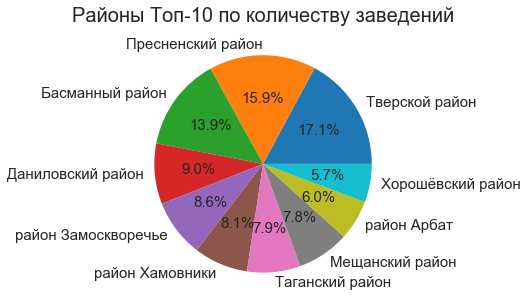

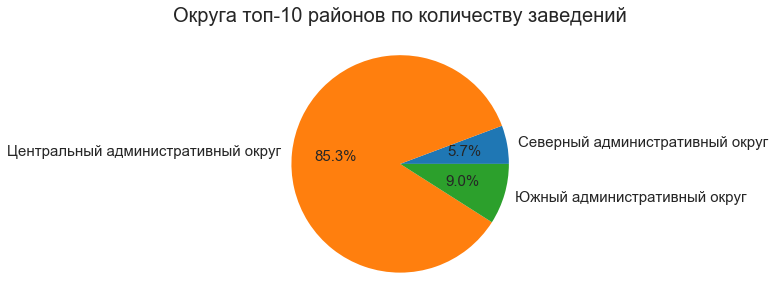

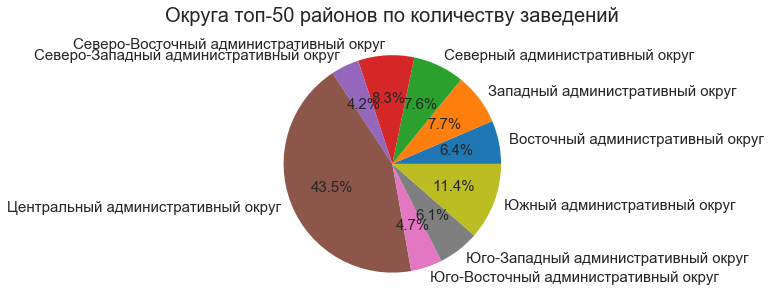

In [12]:
total_top = data.groupby('district').agg({'number':'count','okrug':'first',
                                           }).sort_values(by = 'number', ascending = False).reset_index()
total_top_okrugs_10 = total_top.head(10).groupby('okrug').sum().reset_index()
total_top_okrugs_50 = total_top.head(50).groupby('okrug').sum().reset_index()

fig = plt.figure(figsize=(5,5))
plt.pie(total_top.head(10)['number'],
        labels = total_top.head(10)['district'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Районы Топ-10 по количеству заведений', fontsize = 20)
plt.show()


fig = plt.figure(figsize=(5,5))
plt.pie(total_top_okrugs_10['number'],
        labels = total_top_okrugs_10['okrug'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Округа топ-10 районов по количеству заведений', fontsize = 20)
plt.show()

fig = plt.figure(figsize=(5,5))
plt.pie(total_top_okrugs_50['number'],
        labels = total_top_okrugs_50['okrug'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Округа топ-50 районов по количеству заведений', fontsize = 20)
plt.show()

<h3 style="color:green">Топ-10 улиц с максимальным количествов заведений, их районы и округа</h3>

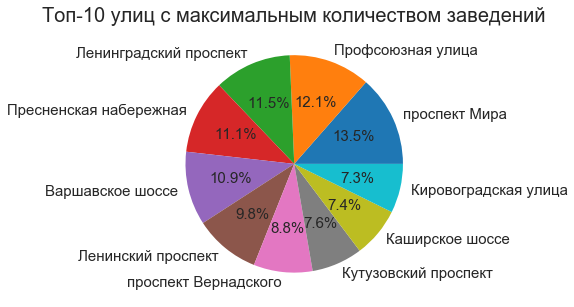

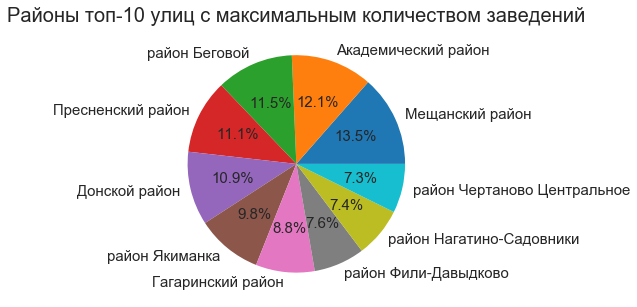

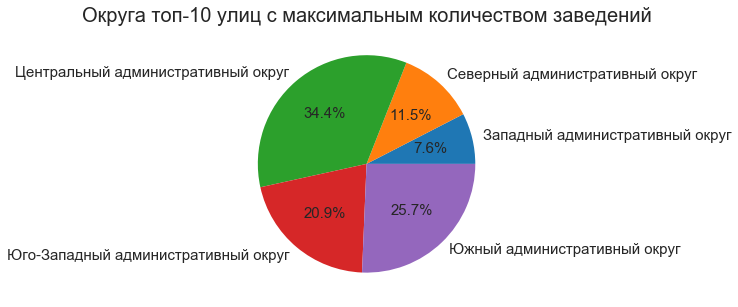

In [13]:
top_10_pivot = data.groupby('street').agg({'number':'count','okrug':'first',
                                           'district':'first'}).sort_values(by = 'number', ascending = False).reset_index().head(10)
fig = plt.figure(figsize=(5,5))
plt.pie(top_10_pivot['number'],
        labels = top_10_pivot['street'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Топ-10 улиц с максимальным количеством заведений', fontsize = 20)
plt.show()


fig = plt.figure(figsize=(5,5))
plt.pie(top_10_pivot['number'],
        labels = top_10_pivot['district'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Районы топ-10 улиц с максимальным количеством заведений', fontsize = 20)
plt.show()


fig = plt.figure(figsize=(5,5))
plt.pie(top_10_pivot.groupby('okrug').sum()['number'],
        labels = top_10_pivot.groupby('okrug').sum().reset_index()['okrug'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Округа топ-10 улиц с максимальным количеством заведений', fontsize = 20)
plt.show()

<h3 style="color:green">Улицы с одним заведением общественного питания, их районы и округа</h3>

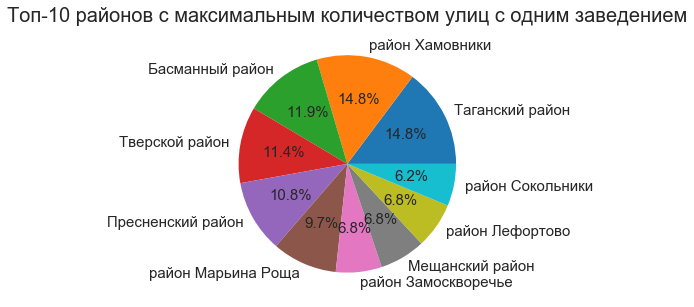

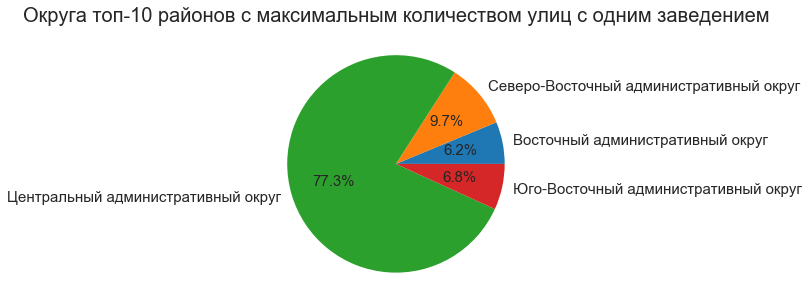

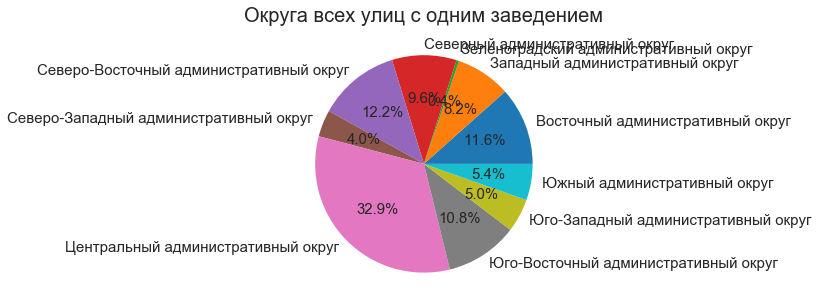

In [14]:
count_obj_by_district = data.groupby('district').count()['id'].reset_index()
count_obj_by_street = data.groupby('street').count()['id'].reset_index()
top_distr = count_obj_by_district[count_obj_by_district['id'] > 200]['district']
top_10_obj = count_obj_by_street.sort_values(by = 'id',ascending = False)['street'].head(10)
one_obj = count_obj_by_street[count_obj_by_street['id'] == 1]['street']
top = data[data['street'].isin(top_10_obj)]
tail = data[data['street'].isin(one_obj)]
top_districts = data[data['district'].isin(top_distr)]


low_streets = tail.groupby('street').agg({'number':'count','district':'first','okrug':'first'}).reset_index()
low_streets_10 = low_streets.sort_values(by = 'number', ascending = False)
low_districts = low_streets.groupby('district').agg({'number':'sum','okrug':'first'}).reset_index()
low_districts_10 = low_districts.sort_values(by = 'number', ascending = False).head(10)
low_okrugs = low_districts.groupby('okrug').sum()
low_okrugs_10 = low_districts_10.groupby('okrug').sum().reset_index()
tail_okrugs = tail.groupby('okrug').count()['number'].reset_index()
fig = plt.figure(figsize=(5,5))


plt.pie(low_districts_10['number'],
        labels = low_districts_10['district'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15}
        )

plt.title('Топ-10 районов с максимальным количеством улиц с одним заведением', fontsize = 20)
plt.show()


plt.show()


fig = plt.figure(figsize=(5,5))
plt.pie(low_okrugs_10['number'],
        labels = low_okrugs_10['okrug'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Округа топ-10 районов с максимальным количеством улиц с одним заведением', fontsize = 20)
plt.show()


fig = plt.figure(figsize=(5,5))
plt.pie(tail_okrugs['number'],
        labels = tail_okrugs['okrug'], autopct = '%1.1f%%',
                                    textprops={'fontsize': 15})
plt.title('Округа всех улиц с одним заведением', fontsize = 20)
plt.show()


In [15]:
low_streets = tail.groupby('street').agg({'number':'count','district':'first','okrug':'first'}).reset_index()
low_districts = low_streets.groupby('district').agg({'number':'sum','okrug':'first'}).reset_index()
low_districts.sort_values(by = 'number', ascending = False).head(20)
low_okrugs = low_districts.groupby('okrug').sum()


<h3 style="color:green">Распределение улиц по округам: все улицы, топ-10, улицы с одним заведением</h3>

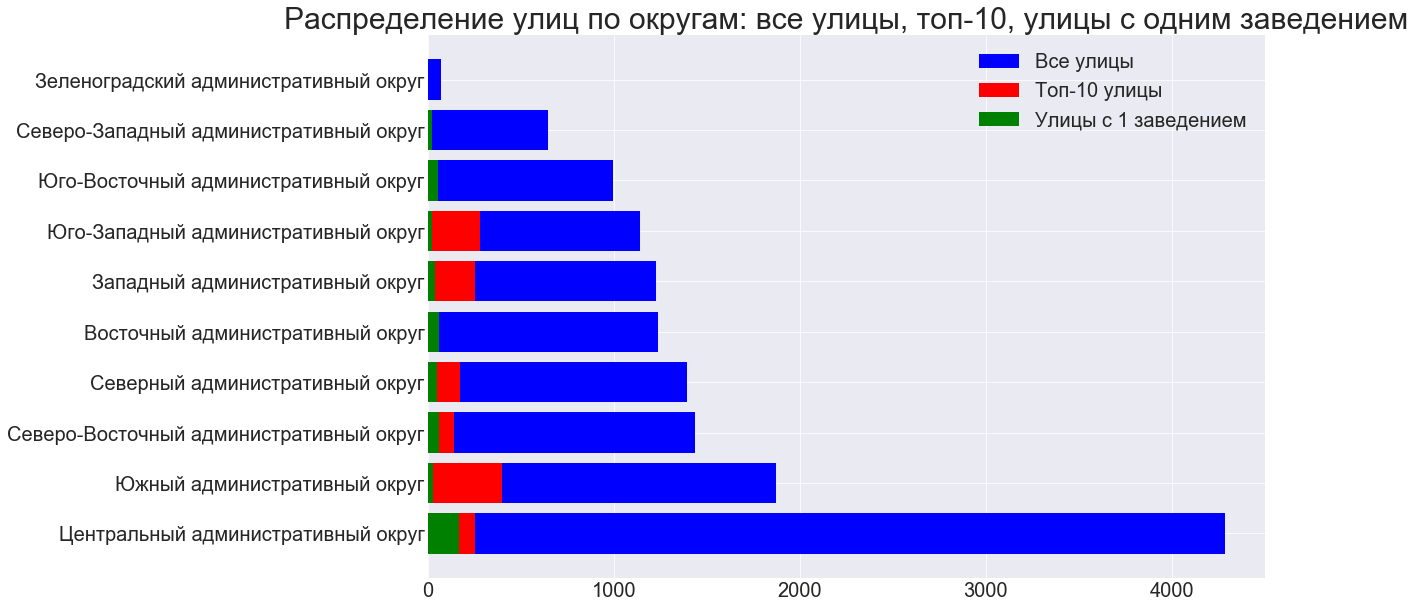

In [16]:
fig = plt.figure(figsize=(15,10))

plt.barh(data.groupby('okrug').count().reset_index().sort_values(by = 'number', ascending = False)['okrug'],
         data.groupby('okrug').count().reset_index().sort_values(by = 'number', ascending = False)['number']
         , color = 'blue', label = 'Все улицы')


plt.barh(top.groupby('okrug').count().reset_index().sort_values(by = 'number', ascending = False)['okrug'],
         top.groupby('okrug').count().reset_index().sort_values(by = 'number', ascending = False)['number'],
        color = 'red', label = 'Топ-10 улицы')



plt.barh(tail.groupby('okrug').count().reset_index().sort_values(by = 'number', ascending = False)['okrug'],
         tail.groupby('okrug').count().reset_index().sort_values(by = 'number', ascending = False)['number'],
        color = 'green', label = 'Улицы с 1 заведением')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.grid()
plt.legend(fontsize = 20)
plt.title('Распределение улиц по округам: все улицы, топ-10, улицы с одним заведением',fontsize = 30)
plt.show()


    Построив графики для улиц с максимальным и минимальным количеством заведений для одной улицы обьективно можно сделать 
    нескольго гипотез:
    
    1. В центре дорогая аренда помещений, это может быть негативным фактором, не позволяющим открыть заведение, поэтому много улиц где всего 1 заведение
    2. В центре много исторических мест, в связи с этим существуют улицы, которые могут состоять вовсе из одного дома, этот факт не может не сказать на статистике количества заведений на улице.
    3. Улицы топ-10 достаточно равномерно распределены по Москве, но можно заметить теденцию, на юге, западе и в центре таких улиц больше.
    

<h3 style="color:green">Распределение количества посадочных мест для улиц топ-10 по количеству заведений</h3>



Text(0.5, 1.0, 'Количество посадочных мест по всем данным')

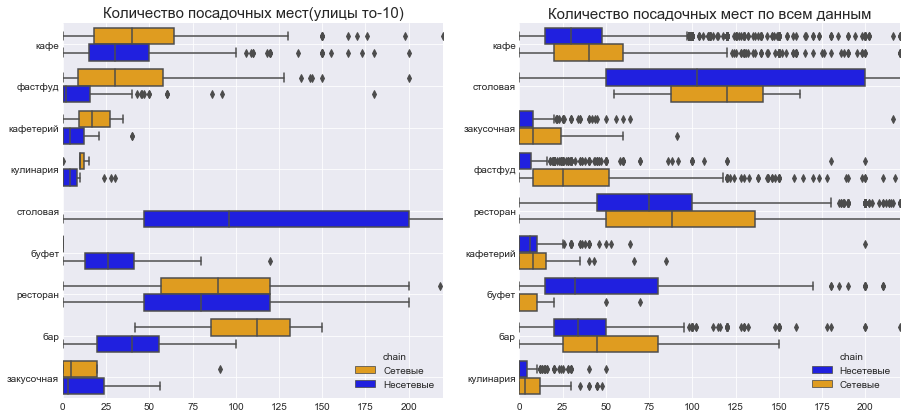

In [17]:
fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.9)
ax2 = fig.add_subplot(221)
my_pal = {'Сетевые':"orange",'Несетевые': "blue"}
sns.boxplot(x="number", y="object_type", data=top, hue = 'chain', palette=my_pal)
plt.xlim(0,220)
# plt.legend(fontsize = 25)
# plt.yticks(fontsize = 20)

plt.ylabel(None)
plt.xlabel(None)
plt.grid()
plt.title('Количество посадочных мест(улицы то-10)',fontsize = 15)

# plt.show()

ax2 = fig.add_subplot(222)
my_pal_2 = { 'Сетевые':"orange",'Несетевые': "blue"}
sns.boxplot(x="number", y="object_type", data=rest_data, hue = 'chain', palette=my_pal_2)
plt.xlim(0,220)
# plt.legend(fontsize = 25)
# plt.yticks(fontsize = 20)
# plt.xticks(fontsize = 20)
plt.ylabel(None)
plt.xlabel(None)
plt.grid()
plt.title('Количество посадочных мест по всем данным',fontsize = 15)

    1. Кафе. ярко выраженного отличия нет
    2. Фастфуд. ярко выраженного отличия нет
    3. Кафетерий, сетевые заведения более заметно крупней несетевых на улицах топ-10
    4. Кулинария, на улицах топ-10 имееи более четкое распределение
    5. Столовых на улицах топ-10 нет, как и буфетов
    6. Ресторан, разница между количеством мест в сетевых и несетевых заведениях меньше чем в общем наборе данных
    7. Бар, лидер по количеству мест в сетевых заведенияя, большая разница относительно несетевых баров.
    8. Закусочная. ярко выраженного отличия нет

<h3 style="color:green">Распределение количества посадочных мест для улиц с большим количеством обьектов</h3>

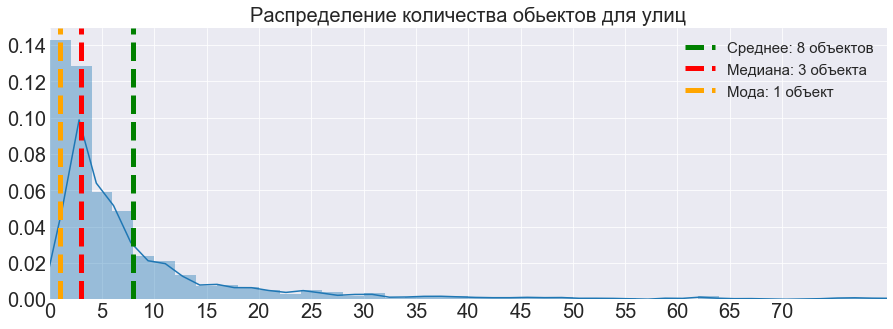

In [18]:
fig = plt.figure(figsize=(15,5))
sns.distplot(data.groupby('street').count().reset_index()['number'],
             bins=[x*2 for x in range(50)])
plt.axvline(x=data.groupby('street').count().reset_index()['number'].mean(),
            color='green', linestyle='--', 
            label = 'Среднее: {:.0f} объектов'.format(data.groupby('street').count().reset_index()['number'].mean()),linewidth = 5)
plt.axvline(x=data.groupby('street').count().reset_index()['number'].median(),
            color='red', linestyle='--', 
            label = 'Медиана: {:.0f} объекта'.format(data.groupby('street').count().reset_index()['number'].median()),linewidth = 5)
plt.axvline(x=data.groupby('street').count().reset_index()['number'].mode()[0],
            color='orange', linestyle='--', 
            label = 'Мода: {:.0f} объект'.format(data.groupby('street').count().reset_index()['number'].mode()[0]),linewidth = 5)
plt.xticks([x*5 for x in range(15)])
plt.xlim(0, 80)
plt.legend()
plt.grid()
plt.xlabel('')
plt.title('Распределение количества обьектов для улиц',fontsize = 20)
plt.legend(fontsize = 15,shadow=True,  facecolor='y', edgecolor='r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

plt.show()


In [19]:
count_str = data.groupby('street')['number'].count().reset_index()
median_str = count_str[count_str['number'] > 3]['street']
mean_str = count_str[count_str['number'] > 8]['street']
too_big = count_str[count_str['number'] > 20]['street']
median_streets = data[data['street'].isin(median_str)]
mean_streets = data[data['street'].isin(mean_str)]
big_streets = data[data['street'].isin(too_big)]

Text(0.5, 1.0, 'Количество посадочных мест по всем данным')

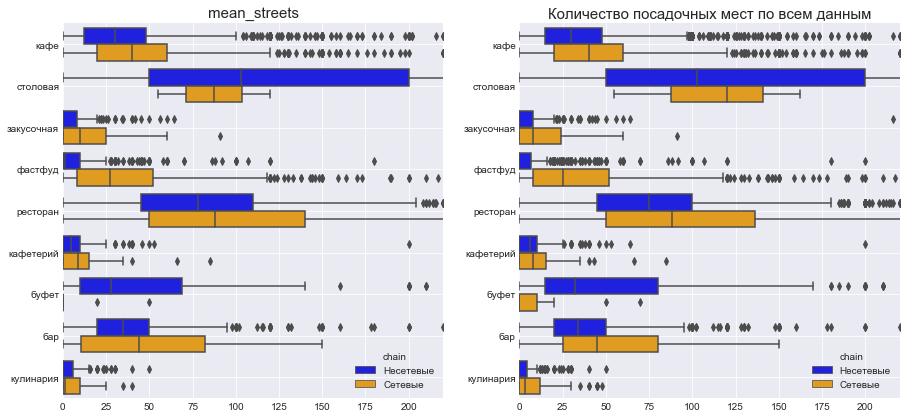

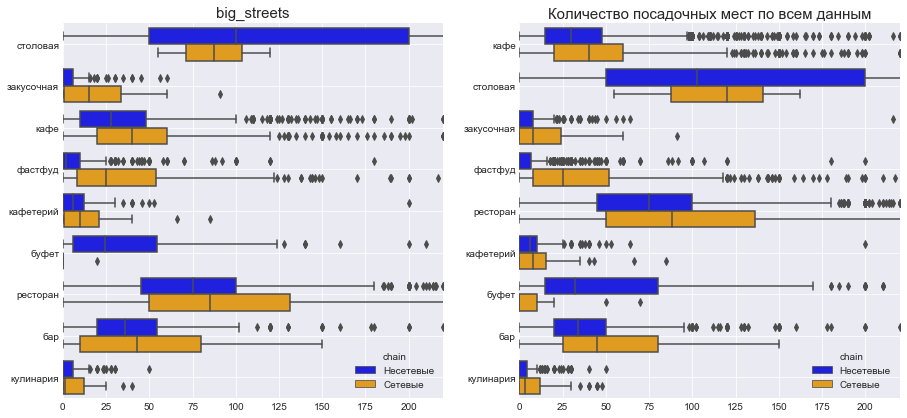

In [20]:
count_streets = data.groupby('street').count().reset_index()['number']



fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.9)
ax2 = fig.add_subplot(221)
my_pal = {'Сетевые':"orange",'Несетевые': "blue"}
sns.boxplot(x="number", y="object_type", data=mean_streets, hue = 'chain', palette=my_pal)
plt.xlim(0,220)
# plt.legend(fontsize = 25)
# plt.yticks(fontsize = 20)

plt.ylabel(None)
plt.xlabel(None)
plt.grid()
plt.title('mean_streets',fontsize = 15)

# plt.show()

ax2 = fig.add_subplot(222)
my_pal_2 = { 'Сетевые':"orange",'Несетевые': "blue"}
sns.boxplot(x="number", y="object_type", data=rest_data, hue = 'chain', palette=my_pal_2)
plt.xlim(0,220)
# plt.legend(fontsize = 25)
# plt.yticks(fontsize = 20)
# plt.xticks(fontsize = 20)
plt.ylabel(None)
plt.xlabel(None)
plt.grid()
plt.title('Количество посадочных мест по всем данным',fontsize = 15)



fig = plt.figure(figsize=(15,20))
fig.subplots_adjust(hspace=0.9)
ax2 = fig.add_subplot(221)
my_pal = {'Сетевые':"orange",'Несетевые': "blue"}
sns.boxplot(x="number", y="object_type", data=big_streets, hue = 'chain', palette=my_pal)
plt.xlim(0,220)
# plt.legend(fontsize = 25)
# plt.yticks(fontsize = 20)

plt.ylabel(None)
plt.xlabel(None)
plt.grid()
plt.title('big_streets',fontsize = 15)

# plt.show()

ax2 = fig.add_subplot(222)
my_pal_2 = { 'Сетевые':"orange",'Несетевые': "blue"}
sns.boxplot(x="number", y="object_type", data=rest_data, hue = 'chain', palette=my_pal_2)
plt.xlim(0,220)
# plt.legend(fontsize = 25)
# plt.yticks(fontsize = 20)
# plt.xticks(fontsize = 20)
plt.ylabel(None)
plt.xlabel(None)
plt.grid()
plt.title('Количество посадочных мест по всем данным',fontsize = 15)

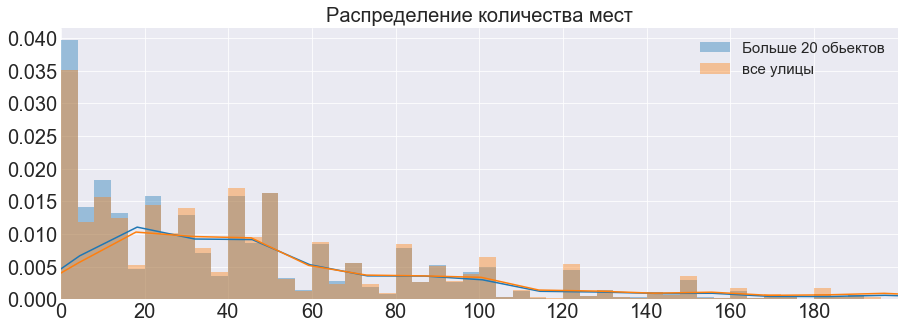

In [21]:
fig = plt.figure(figsize=(15,5))
sns.distplot(big_streets['number'],
             bins=[x*4 for x in range(50)], label = 'Больше 20 обьектов')
sns.distplot(data['number'],
             bins=[x*4 for x in range(50)], label = 'все улицы')
# plt.axvline(x=data.groupby('street').count().reset_index()['number'].mean(),
#             color='green', linestyle='--', 
#             label = 'Среднее: {:.0f} объектов'.format(data.groupby('street').count().reset_index()['number'].mean()),linewidth = 5)
# plt.axvline(x=data.groupby('street').count().reset_index()['number'].median(),
#             color='red', linestyle='--', 
#             label = 'Медиана: {:.0f} объекта'.format(data.groupby('street').count().reset_index()['number'].median()),linewidth = 5)
# plt.axvline(x=data.groupby('street').count().reset_index()['number'].mode()[0],
#             color='orange', linestyle='--', 
#             label = 'Мода: {:.0f} объект'.format(data.groupby('street').count().reset_index()['number'].mode()[0]),linewidth = 5)
plt.xticks([x*20 for x in range(10)])
plt.xlim(0, 200)
plt.legend()
plt.grid()
plt.xlabel('')
plt.title('Распределение количества мест',fontsize = 20)
plt.legend(fontsize = 15,shadow=True,  facecolor='y', edgecolor='r')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

plt.show()


    с увеличение заведений на улице:
    
    становится больше небольших баров
    

<h3 style="color:green">Общий вывод</h3>

    Кафе - самый популярный вид общепита, его больше чем любого другого вида общепита в 2.5 раза
    
    Фастфуд - самый сетевой вид общепита, более 40 процентов
    
    20 процентов заведений общепита сетевые
    
    Сетевые заведения в среднем больше чем не сетевые, разница около 10-15 процентов
    
    В южном административном округе больше всего как топ-улиц, улиц всего с 1 заведением больше всего в центральном. 
    
    Сетевые рестораны на улицах топ-10 не больше несетевых, что заметно отличается от общей выборки
    
Рекомендации:

    Если говорить о виде, то логично выбирать из самых популярных: кафе, фастфуд, ресторан, бар
    Столовая тоже популярный вид, но рассматривать его как сетевой сложно
    
    Количество посадочных мест стоит выбирать отталкиваясь в первую очередь от бизнес модели, во вторую от места и условий, в третью от среднего и медианного значений для подобных заведений.
    
    Место тоже зависит от бизнес модели, центральный округ самый популярный вариант, а в нём Пресненский район
    
    
    Возможности развития сети можно рассматривать с точки зрения увеличения количества сетевых заведений
    
    
    
    